# <center><font color = '#DF9166' size = 20 center> **Training Tokenizer**</font></center>



## <font color = '#DF9166' size=6>**Table of content**<font/><a class = 'anchor' id = 'introduction'/>

1. [**Import Libraries**](#import)
2. [**Data Loading**](#data_loading)
3. [**Data Exploration**](#data_exploration)
4. [**Tokenizer Training**](#tokenizer_training)

## <font color = '#DF9166' size=6>**Import Libraries**<font/><a class = 'anchor' id = 'import'/>


In [ ]:
import os
import sys
import random
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
from torch.nn import Linear

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

In [ ]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth", None)

In [ ]:
sys.path.append(os.path.abspath(os.pardir))
from scripts.label_data import *
from scripts.visualize import plot_top_tokens, plot_label_distribution

## <font color = '#DF9166' size=6>**Data Loading**<font/><a class = 'anchor' id = 'data_loading'/>

In [ ]:
DATA_PATH = (
    "/content/drive/MyDrive/10 acadamy/W5 Challenge/data/processed/labeled_data.conll"
)

In [ ]:
conll_df = load_conll_to_dataframe(DATA_PATH)
conll_df.head()

,message_num,token,label
0,1,Wonder,B-PRODUCT
1,1,Korean,I-PRODUCT
2,1,Product,I-PRODUCT
3,1,P.L.C,I-PRODUCT
4,1,Wonder,B-PRODUCT


## <font color = '#DF9166' size=6>**Data Exploration**<font/><a class = 'anchor' id = 'data_exploration'/>

In [ ]:
conll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200499 entries, 0 to 200498
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   message_num  200499 non-null  int64 
 1   token        200499 non-null  object
 2   label        200499 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.6+ MB


In [ ]:
print(f"Number of unique message_nums: {conll_df['message_num'].nunique()}")

Number of unique message_nums: 2313


In [ ]:
print(f'The number of unique tokens is: {conll_df["token"].nunique()}')

The number of unique tokens is: 5067


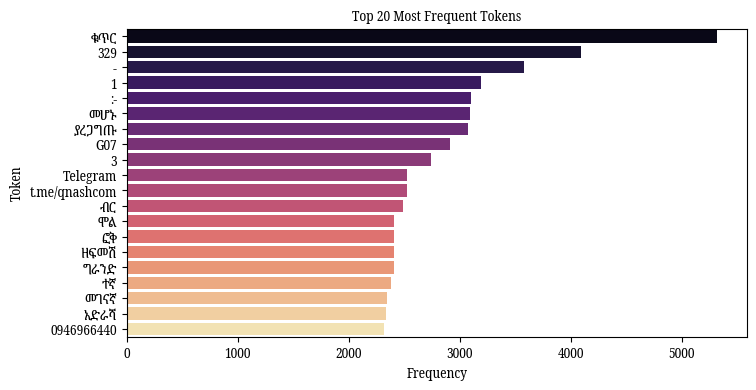

In [ ]:
plot_top_tokens(conll_df)

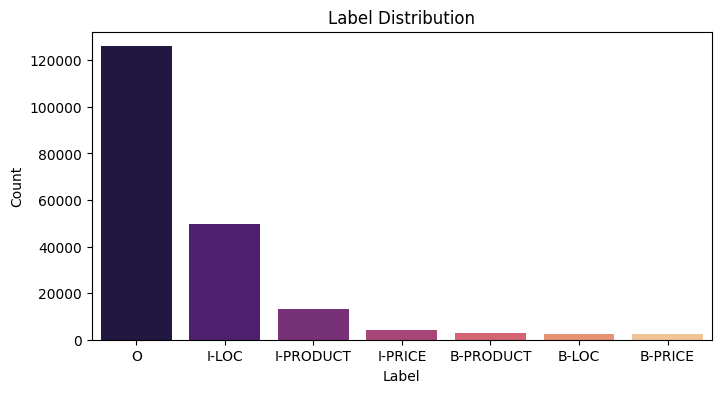

In [ ]:
plot_label_distribution(conll_df)

## <font color = '#DF9166' size=6>**Tokenizer Training**<font/><a class = 'anchor' id = 'tokenizer_training'/>

In [ ]:
MODEL_IDS = ["dslim/bert-base-NER", "dslim/distilbert-NER"]

### `bert-base-NER` Model


In [ ]:
bert_tokenizer = AutoTokenizer.from_pretrained(MODEL_IDS[0])
bert_model = AutoModelForTokenClassification.from_pretrained(MODEL_IDS[0])

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


#### Model Inspection

In [ ]:
nlp = pipeline("ner", model=bert_model, tokenizer=bert_tokenizer)
example = "My name is Wolfgang and I live in Berlin"

ner_results = nlp(example)
print(ner_results)

Device set to use cpu


[{'entity': 'B-PER', 'score': 0.9990139, 'index': 4, 'word': 'Wolfgang', 'start': 11, 'end': 19}, {'entity': 'B-LOC', 'score': 0.999645, 'index': 9, 'word': 'Berlin', 'start': 34, 'end': 40}]


In [ ]:
random_message_num = random.choice(conll_df["message_num"].unique())
selected_df = conll_df[conll_df["message_num"] == random_message_num]
concatenated_tokens = " ".join(selected_df["token"])

print(f"Selected message_num: {random_message_num}")
print(f"Example Message: {concatenated_tokens}")

ner_results = nlp(concatenated_tokens)
ner_results

Selected message_num: 2131
Example Message: Sonifer Electric Steam Iron High Quality 100% Ceramic Soleplate Spray / Steam / Burst of Steam / vertical Steam 360 Degree Swivel Cord Guard With indicate light Adjustable temperature Control Water tank capacity : 250ml Continue Steam Rate : 15g/minute AC 220-240V 2000W wool Polyester Cottoj Silk ዋጋ፦ 2700 ብር ለማዘዝ = @Orderqnash Telegram - t.me/qnashcom ጥራት ዋስትና ቅናሽ አድራሻ ፦ ቁጥር 1 :- መገናኛ ዘፍመሽ ግራንድ ሞል 3 ተኛ ፎቅ ቁጥር 329 ቁጥር 2 :- ጀሞ 1 ከለላ ህንፃ ግራውንድ ለይ G07 ማሳሰብያ: ሱቃችን ሲመጡ ትክክለኛ የኛ ሱቅ መሆኑ ያረጋግጡ የራሳችን ሎጎ መኖሩን እና 329 / G07 መሆኑ ያረጋግጡ ! ስልክ: 0946966440 0992606060 0905464599


[{'entity': 'B-ORG',
  'score': 0.8807284,
  'index': 1,
  'word': 'Son',
  'start': 0,
  'end': 3},
 {'entity': 'I-ORG',
  'score': 0.4640923,
  'index': 2,
  'word': '##ifer',
  'start': 3,
  'end': 7},
 {'entity': 'I-ORG',
  'score': 0.73146,
  'index': 3,
  'word': 'Electric',
  'start': 8,
  'end': 16},
 {'entity': 'I-ORG',
  'score': 0.53092384,
  'index': 4,
  'word': 'Steam',
  'start': 17,
  'end': 22}]

In [ ]:
ner_results = nlp("ለሚወዱት ልጂዎ ታላቅ ስጦታ")
ner_results

[]

In [ ]:
bert_model

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [ ]:
bert_model.config

BertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "dslim/bert-base-NER",
  "_num_labels": 9,
  "architectures": [
    "BertForTokenClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "O",
    "1": "B-MISC",
    "2": "I-MISC",
    "3": "B-PER",
    "4": "I-PER",
    "5": "B-ORG",
    "6": "I-ORG",
    "7": "B-LOC",
    "8": "I-LOC"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "B-LOC": 7,
    "B-MISC": 1,
    "B-ORG": 5,
    "B-PER": 3,
    "I-LOC": 8,
    "I-MISC": 2,
    "I-ORG": 6,
    "I-PER": 4,
    "O": 0
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.47.1",
  "type_vocab_size"

#### Tokenizer Inspection

In [ ]:
example = "My name is Wolfgang and I live in Berlin"
bert_tokenizer.tokenize(example)

['My', 'name', 'is', 'Wolfgang', 'and', 'I', 'live', 'in', 'Berlin']

In [ ]:
len(bert_tokenizer)

28996

In [ ]:
example = "ለሚወዱት ልጂዎ ታላቅ ስጦታ"
bert_tokenizer.tokenize(example)

['[UNK]', '[UNK]', '[UNK]', '[UNK]']

#### Extending Vocabulary

In [ ]:
# Get unique Amharic and English tokens
unique_tokens = conll_df["token"].unique().tolist()
unique_tokens[:30]

['Wonder',
 'Korean',
 'Product',
 'P.L.C',
 'Manual',
 'መፍጫ',
 'ከኮርያ',
 '8',
 'አይነት',
 'መለዋወጫ',
 'ያለው',
 'ሁለገብ',
 'መፍጫ።',
 'ለብርቱካን',
 '፣',
 'ካሮት',
 'አናናስ',
 'ሎሚ',
 'መንደሪን',
 'የመሳሰሉትን',
 'ፍራፍሬዎች',
 'ለመጭመቅ',
 'የሚያስችል',
 'ነው።',
 'በተጨማሪም',
 'ቆሻሻውን',
 'ከጭማቂው',
 'እየለየ',
 'ጁስ',
 'ለመስራት']

In [ ]:
# Add your unique tokens to the tokenizer's vocabulary
bert_tokenizer.add_tokens(unique_tokens)

5067

In [ ]:
print(f"Vocabulary size after adding tokens: {len(bert_tokenizer)}")

Vocabulary size after adding tokens: 32836


#### Modifying the Model

In [ ]:
labels = conll_df.label.unique().tolist()
labels

['B-PRODUCT', 'I-PRODUCT', 'O', 'B-LOC', 'I-LOC', 'B-PRICE', 'I-PRICE']

In [ ]:
bert_model.config.id2label = {
    "0": "O",
    "1": "B-PRODUCT",
    "2": "I-PRODUCT",
    "3": "B-LOC",
    "4": "I-LOC",
    "5": "B-PRICE",
    "6": "I-PRICE",
}
bert_model.config.label2id = {
    "B-LOC": 3,
    "B-PRICE": 5,
    "B-PRODUCT": 1,
    "I-LOC": 4,
    "I-PRICE": 6,
    "I-PRODUCT": 2,
    "O": 0,
}
bert_model.config.vocab_size = len(bert_tokenizer)

In [ ]:
# Modify the last layer of the model to output 6 output
bert_model.classifier = Linear(in_features=768, out_features=len(labels), bias=True)

In [ ]:
# Resize the token embeddings of the model
bert_model.resize_token_embeddings(len(bert_tokenizer))

Embedding(32836, 768, padding_idx=0)

In [ ]:
# Model after token extension
bert_model

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32836, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

#### Final Inspection

In [ ]:
example = "ለሚወዱት ልጂዎ ታላቅ ስጦታ"
bert_tokenizer.tokenize(example)

['ለሚወዱት', 'ልጂዎ', 'ታላቅ', 'ስጦታ']

#### Pushing Changes to HF Hub

In [ ]:
bert_tokenizer.push_to_hub(
    repo_id="Naod-Demissie/bert-amh-telegram",
)
bert_model.push_to_hub(
    repo_id="Naod-Demissie/bert-amh-telegram",
)

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Naod-Demissie/bert-amh-telegram/commit/90148544a9fef24ef52c8ffbff5ff21429f6d1e5', commit_message='Upload BertForTokenClassification', commit_description='', oid='90148544a9fef24ef52c8ffbff5ff21429f6d1e5', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Naod-Demissie/bert-amh-telegram', endpoint='https://huggingface.co', repo_type='model', repo_id='Naod-Demissie/bert-amh-telegram'), pr_revision=None, pr_num=None)

### `distilbert-NER` Model


In [ ]:
distlbert_tokenizer = AutoTokenizer.from_pretrained(MODEL_IDS[1])
distlbert_model = AutoModelForTokenClassification.from_pretrained(MODEL_IDS[1])

#### Model Inspection

In [ ]:
nlp = pipeline("ner", model=distlbert_model, tokenizer=distlbert_tokenizer)
example = "My name is Wolfgang and I live in Berlin"

ner_results = nlp(example)
print(ner_results)

Device set to use cpu


[{'entity': 'B-PER', 'score': 0.99110633, 'index': 4, 'word': 'Wolfgang', 'start': 11, 'end': 19}, {'entity': 'B-LOC', 'score': 0.9967968, 'index': 9, 'word': 'Berlin', 'start': 34, 'end': 40}]


In [ ]:
random_message_num = random.choice(conll_df["message_num"].unique())
selected_df = conll_df[conll_df["message_num"] == random_message_num]
concatenated_tokens = " ".join(selected_df["token"])

print(f"Selected message_num: {random_message_num}")
print(f"Example Message: {concatenated_tokens}")

ner_results = nlp(concatenated_tokens)
ner_results

Selected message_num: 2140
Example Message: በዚህ ክረምት ደረጃ ላይ እንዳያንሽራተት የሚጠቅም ሁነኛ ተለጣፊ ፕላስተር Anti slip tape ደረጃ ወይም የተለያዩ ቦታዎች እንዳያንሸራትት የሚለጠፍ ፕላስተር ሳይዝ: 3 ሜትር ዋጋ፦ 550 ብር ለማዘዝ = @Orderqnash Telegram - t.me/qnashcom ጥራት ዋስትና ቅናሽ አድራሻ ፦ ቁጥር 1 :- መገናኛ ዘፍመሽ ግራንድ ሞል 3 ተኛ ፎቅ ቁጥር 329 ቁጥር 2 :- ጀሞ 1 ከለላ ህንፃ ግራውንድ ለይ G07 ማሳሰብያ: ሱቃችን ሲመጡ ትክክለኛ የኛ ሱቅ መሆኑ ያረጋግጡ የራሳችን ሎጎ መኖሩን እና 329 / G07 መሆኑ ያረጋግጡ ! ስልክ: 0946966440 0992606060 0905464599


[{'entity': 'B-ORG',
  'score': 0.828177,
  'index': 31,
  'word': 'Order',
  'start': 133,
  'end': 138},
 {'entity': 'B-ORG',
  'score': 0.86284006,
  'index': 32,
  'word': '##q',
  'start': 138,
  'end': 139},
 {'entity': 'B-ORG',
  'score': 0.8942238,
  'index': 33,
  'word': '##nas',
  'start': 139,
  'end': 142},
 {'entity': 'B-ORG',
  'score': 0.6574791,
  'index': 34,
  'word': '##h',
  'start': 142,
  'end': 143},
 {'entity': 'I-MISC',
  'score': 0.40034342,
  'index': 35,
  'word': 'Tel',
  'start': 144,
  'end': 147},
 {'entity': 'I-MISC',
  'score': 0.5364322,
  'index': 36,
  'word': '##eg',
  'start': 147,
  'end': 149},
 {'entity': 'I-ORG',
  'score': 0.44171357,
  'index': 37,
  'word': '##ram',
  'start': 149,
  'end': 152},
 {'entity': 'B-ORG',
  'score': 0.77627254,
  'index': 44,
  'word': '##nas',
  'start': 161,
  'end': 164},
 {'entity': 'B-ORG',
  'score': 0.5582538,
  'index': 45,
  'word': '##h',
  'start': 164,
  'end': 165},
 {'entity': 'B-ORG',
  'score': 

In [ ]:
ner_results = nlp("ለሚወዱት ልጂዎ ታላቅ ስጦታ")
ner_results

[]

In [ ]:
distlbert_model

DistilBertForTokenClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
   

In [ ]:
distlbert_model.config

DistilBertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "dslim/distilbert-NER",
  "activation": "gelu",
  "architectures": [
    "DistilBertForTokenClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "O",
    "1": "B-PER",
    "2": "I-PER",
    "3": "B-ORG",
    "4": "I-ORG",
    "5": "B-LOC",
    "6": "I-LOC",
    "7": "B-MISC",
    "8": "I-MISC"
  },
  "initializer_range": 0.02,
  "label2id": {
    "B-LOC": 5,
    "B-MISC": 7,
    "B-ORG": 3,
    "B-PER": 1,
    "I-LOC": 6,
    "I-MISC": 8,
    "I-ORG": 4,
    "I-PER": 2,
    "O": 0
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.47.1",
  "vocab_size": 28996
}

#### Tokenizer Inspection

In [ ]:
example = "My name is Wolfgang and I live in Berlin"
distlbert_tokenizer.tokenize(example)

['My', 'name', 'is', 'Wolfgang', 'and', 'I', 'live', 'in', 'Berlin']

In [ ]:
len(distlbert_tokenizer)

28996

In [ ]:
example = "ለሚወዱት ልጂዎ ታላቅ ስጦታ"
distlbert_tokenizer.tokenize(example)

['[UNK]', '[UNK]', '[UNK]', '[UNK]']

#### Extending Vocabulary

In [ ]:
# Get unique Amharic and English tokens
unique_tokens = conll_df["token"].unique().tolist()
unique_tokens[:30]

['Wonder',
 'Korean',
 'Product',
 'P.L.C',
 'Manual',
 'መፍጫ',
 'ከኮርያ',
 '8',
 'አይነት',
 'መለዋወጫ',
 'ያለው',
 'ሁለገብ',
 'መፍጫ።',
 'ለብርቱካን',
 '፣',
 'ካሮት',
 'አናናስ',
 'ሎሚ',
 'መንደሪን',
 'የመሳሰሉትን',
 'ፍራፍሬዎች',
 'ለመጭመቅ',
 'የሚያስችል',
 'ነው።',
 'በተጨማሪም',
 'ቆሻሻውን',
 'ከጭማቂው',
 'እየለየ',
 'ጁስ',
 'ለመስራት']

In [ ]:
# Add your unique tokens to the tokenizer's vocabulary
distlbert_tokenizer.add_tokens(unique_tokens)

5067

In [ ]:
print(f"Vocabulary size after adding tokens: {len(distlbert_tokenizer)}")

Vocabulary size after adding tokens: 32836


#### Modifying the Model

In [ ]:
labels = conll_df.label.unique().tolist()
labels

['B-PRODUCT', 'I-PRODUCT', 'O', 'B-LOC', 'I-LOC', 'B-PRICE', 'I-PRICE']

In [ ]:
distlbert_model.config.id2label = {
    "0": "O",
    "1": "B-PRODUCT",
    "2": "I-PRODUCT",
    "3": "B-LOC",
    "4": "I-LOC",
    "5": "B-PRICE",
    "6": "I-PRICE",
}
distlbert_model.config.label2id = {
    "B-LOC": 3,
    "B-PRICE": 5,
    "B-PRODUCT": 1,
    "I-LOC": 4,
    "I-PRICE": 6,
    "I-PRODUCT": 2,
    "O": 0,
}
distlbert_model.config.vocab_size = len(distlbert_tokenizer)

In [ ]:
# Modify the last layer of the model to output 6 output
distlbert_model.classifier = Linear(
    in_features=768, out_features=len(labels), bias=True
)

In [ ]:
# Resize the token embeddings of the model
distlbert_model.resize_token_embeddings(len(distlbert_tokenizer))

Embedding(32836, 768, padding_idx=0)

In [ ]:
# Model after token extension
distlbert_model

DistilBertForTokenClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(32836, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
   

#### Final Inspection

In [ ]:
example = "ለሚወዱት ልጂዎ ታላቅ ስጦታ"
distlbert_tokenizer.tokenize(example)

['ለሚወዱት', 'ልጂዎ', 'ታላቅ', 'ስጦታ']

#### Pushing Changes to HF Hub

In [ ]:
distlbert_tokenizer.push_to_hub(
    repo_id="Naod-Demissie/distlbert-amh-telegram",
)
distlbert_model.push_to_hub(
    repo_id="Naod-Demissie/distlbert-amh-telegram",
)

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/273M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Naod-Demissie/distlbert-amh-telegram/commit/8527af974586c6ea92285ab98f0742f97d10b495', commit_message='Upload DistilBertForTokenClassification', commit_description='', oid='8527af974586c6ea92285ab98f0742f97d10b495', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Naod-Demissie/distlbert-amh-telegram', endpoint='https://huggingface.co', repo_type='model', repo_id='Naod-Demissie/distlbert-amh-telegram'), pr_revision=None, pr_num=None)